In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt

In [25]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)


In [26]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Download and Unzip State by State dataset

In [ ]:
import requests
from bs4 import BeautifulSoup
import os
import zipfile
# Download the additional ZIP file
additional_zip_url = 'https://www.epa.gov/system/files/other-files/2024-09/allstateghgdata90-22_v082924.zip'
additional_zip_path = 'epa_data/allstateghgdata.zip'

os.makedirs('epa_data', exist_ok=True)

print(f"Downloading {additional_zip_url}...")
response = requests.get(additional_zip_url)
with open(additional_zip_path, 'wb') as file:
    file.write(response.content)

print("File downloaded.")

# Unzip the file
with zipfile.ZipFile(additional_zip_path, 'r') as zip_ref:
    zip_ref.extractall('epa_data')

print("File unzipped.")
os.rename('epa_data/allstateghgdata90-22_v082924.xlsx', 'epa_data/allstateghgdata.xlsx')


In [21]:
# Assuming the Excel file is named 'allstateghgdata.xlsx' and is located in the 'epa_data' directory
excel_file_path = 'epa_data/allstateghgdata.xlsx'

# Read the Excel file with multiple sheets
un_sector = pd.read_excel(excel_file_path, sheet_name=1)
econ_sector = pd.read_excel(excel_file_path, sheet_name=2)





In [21]:
un_sector.head(5000)

,sector,subsector,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,carbon_pool,fuel1,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002264,0.002704,0.003249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Energy,Fossil Fuel Combustion,Electricity Generation,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,...,4.739748,4.658789,5.468827,4.645333,4.600432,4.399710,6.081696,5.428694,6.431485,5.536678
4996,Energy,Fossil Fuel Combustion,Electricity Generation,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,...,0.008881,0.008903,0.010394,0.008758,0.008794,0.008403,0.011697,0.010442,0.012451,0.008723
4997,Energy,Fossil Fuel Combustion,Electricity Generation,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,...,0.029171,0.029263,0.034161,0.028782,0.028906,0.027615,0.038437,0.034317,0.040937,0.028600
4998,Energy,Fossil Fuel Combustion,Electricity Generation,NaN,NaN,NaN,NaN,NaN,NaN,Natural Gas,...,3.297340,3.254837,5.441986,6.434515,5.767830,6.963073,7.987417,8.706935,8.186948,9.520298


In [20]:
un_sector.to_csv('testCSV.csv', index=False)

In [16]:
econ_sector.head()

,econ_sector,econ_subsector,sector,subsector,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,0.021973,0.020588,0.003934,0.004712,0.003303,0.004553,0.003750,0.004008,0.004094,0.004039
1,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,0.405321,0.340277,0.299993,0.389063,0.319967,0.376200,0.386687,0.345480,0.352673,0.347956
2,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,1.488775,1.333660,1.203423,1.228332,0.916704,1.130034,1.070653,1.032991,1.052542,1.038465
3,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,0.582441,0.598184,0.449419,0.566802,0.490579,0.400804,0.437455,0.392028,0.398905,0.393570
4,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,4.009574,4.711127,4.518359,3.914111,3.825177,3.540273,3.216634,3.076691,3.134478,3.092556


In [17]:
un_sector.columns
econ_sector.columns

Index(['sector', 'subsector', 'category', 'sub_category_1', 'sub_category_2',
       'sub_category_3', 'sub_category_4', 'sub_category_5', 'carbon_pool',
       'fuel1', 'fuel2', 'geo_ref', 'units', 'ghg_category', 'ghg', 'gwp',
       'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997',
       'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
       'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013',
       'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021',
       'Y2022'],
      dtype='object')

Index(['econ_sector', 'econ_subsector', 'sector', 'subsector', 'category',
       'sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4',
       'sub_category_5', 'carbon_pool', 'fuel1', 'fuel2', 'geo_ref', 'units',
       'ghg', 'ghg_category', 'gwp', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017',
       'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022'],
      dtype='object')

In [19]:
print(un_sector['geo_ref'])

0        AK
1        AL
2        AR
3        AS
4        AZ
         ..
28443    WI
28444    WV
28445    WV
28446    WY
28447    WY
Name: geo_ref, Length: 28448, dtype: object


In [ ]:
from pprint import pprint

un_sector['sector'].unique()
un_sector['subsector'].unique()
pprint(un_sector.groupby('sector')['subsector'].unique())

In [ ]:
length = len(un_sector)
for i in range(1, 6):
    na_sum = un_sector[f'sub_category_{i}'].isna().sum()
    if na_sum == length:
        un_sector = un_sector.drop(columns=[f'sub_category_{i}'])

In [ ]:
un_sector.columns

In [ ]:
un_sector['fuel1'].isna().sum()
un_sector['fuel2'].isna().sum()

In [ ]:
un_sector.head()

In [ ]:
un_sector['ghg_category'].unique()

In [ ]:
# un_sector.groupby(['sector', 'geo_ref'])['ghg_category'].nunique()
time = ['Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022']
sector_sum = un_sector.groupby(['sector'])[time].sum()
state_sum = un_sector.groupby(['sector', 'geo_ref', 'ghg_category'])[time].sum()
sector_sum
state_sum

In [ ]:
sector_sum_diff = sector_sum.pct_change(axis='columns') * 100
sector_sum_diff


In [ ]:
# Plotting sector_sum_diff data with 6 lines for each sector
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors for each sector
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot each sector
for (sector), color in zip(sector_sum_diff.index, colors):
    ax.plot(time, sector_sum_diff.loc[sector], label=f'{sector}', color=color)

ax.set_xlabel('Year')
ax.set_ylabel('Percentage Change')
ax.set_title('Percentage Change by Sector from 1990 to 2022')
ax.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:

# Plotting sector_sum data with 6 lines for each sector
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors for each sector
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot each sector
for (sector), color in zip(sector_sum.index, colors):
    ax.plot(time, sector_sum.loc[sector], label=f'{sector}', color=color)

ax.set_xlabel('Year')
ax.set_ylabel('Concentrations')
ax.set_title('Concentrations by Sector and GHG Category from 1990 to 2022')
ax.legend(title='Sector and GHG Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#nunique of geo_ref
un_sector['geo_ref'].unique()
un_sector['geo_ref'].nunique()


array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UM', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI',
       'WV', 'WY', 'National', 'FO', 'FM', 'MH', 'PW', 'USTERR'],
      dtype=object)

63

In [98]:
stateWeatherDF = pd.read_csv('StateWeatherData.csv')
stateWeatherDF.head()
avg = (stateWeatherDF.drop(columns=['Year']).mean().sum())/49
state_abbrev = stateWeatherDF.columns.to_list()
state_abbrev.remove('Year')

,Year,AL,AK,AZ,AR,CA,CO,CT,DE,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,1990,64.9,25.4,59.7,61.8,58.0,45.6,51.1,57.2,72.5,...,46.9,59.4,65.6,48.7,44.1,57.4,47.3,53.9,44.5,41.9
1,1991,64.0,27.0,59.3,61.3,58.1,45.1,51.0,56.9,71.8,...,46.8,59.1,64.8,47.5,43.5,57.0,47.1,53.9,43.7,41.7
2,1992,62.1,25.0,59.6,59.9,59.3,45.3,47.7,53.9,70.3,...,45.6,57.0,64.4,49.0,40.6,54.4,48.6,51.3,42.7,42.5
3,1993,62.3,29.9,59.8,59.3,57.7,43.8,48.7,54.9,70.3,...,42.3,57.2,64.1,46.8,41.2,55.1,45.6,51.9,41.7,38.9
4,1994,63.1,26.2,60.6,60.4,58.0,46.5,48.9,55.0,71.6,...,44.9,57.6,65.6,49.7,41.3,55.3,47.9,51.8,43.0,42.9


In [102]:
abbrevList = un_sector['geo_ref'].unique().tolist()

len(abbrevList)
non_matching_values = [value for value in abbrevList if value not in state_abbrev]
non_matching_values

un_sector.drop(un_sector[un_sector['geo_ref'].isin(non_matching_values)].index, inplace=True)
un_sector['geo_ref'].nunique()

49

[]

49

In [103]:
# Initialize YearTemp columns in un_sector DataFrame
years = range(1990, 2023)
for year in years:
    un_sector[f'{year}Temp'] = None

# Populate YearTemp columns in un_sector
for idx, row in un_sector.iterrows():
    state = row['geo_ref']  # Get the state abbreviation
    for year in years:
        year_column = f'{year}Temp'
        if state in stateWeatherDF.columns:  # Check if state exists in stateWeatherDF
            # Match the year and extract the value
            temp_value = stateWeatherDF.loc[stateWeatherDF['Year'] == year, state].values
            if temp_value.size > 0:  # If value exists
                un_sector.at[idx, year_column] = temp_value[0]
            else:
                un_sector.at[idx, year_column] = avg  # Use custom average
        else:
            un_sector.at[idx, year_column] = avg  # Use custom average for missing state

print(un_sector)

            sector                                          subsector  \
0      Agriculture  CO2 Emissions from Liming, Urea Application an...   
1      Agriculture  CO2 Emissions from Liming, Urea Application an...   
2      Agriculture  CO2 Emissions from Liming, Urea Application an...   
4      Agriculture  CO2 Emissions from Liming, Urea Application an...   
5      Agriculture  CO2 Emissions from Liming, Urea Application an...   
...            ...                                                ...   
28443        Waste                 Wastewater Treatment and Discharge   
28444        Waste                 Wastewater Treatment and Discharge   
28445        Waste                 Wastewater Treatment and Discharge   
28446        Waste                 Wastewater Treatment and Discharge   
28447        Waste                 Wastewater Treatment and Discharge   

         category sub_category_1 sub_category_2 sub_category_3 carbon_pool  \
0          Liming       Dolomite            N

In [108]:
un_sector.to_csv('unSectorWithTemp.csv', index=False)

835890


LinearRegression()

Text(0.5, 0, 'Y1990, Y1991, ... (Combined)')

Text(0, 0.5, 'Temp (Combined)')

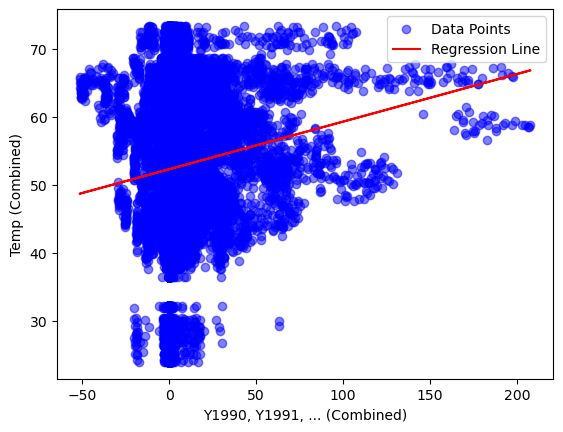

In [114]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Reshape data for a single linear regression
years = range(1990, 2023)
X = []
Y = []

# Loop through years and combine columns
for year in years:
    X.extend(un_sector[f"Y{year}"].values)  # Independent variable
    Y.extend(un_sector[f"{year}Temp"].values)  # Dependent variable
print(len(X))
# Convert to numpy arrays
X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, Y)

# Predict the Y values
Y_pred = model.predict(X)

# Plot the data points
plt.scatter(X, Y, color='blue', alpha=0.5, label='Data Points')

# Plot the regression line
plt.plot(X, Y_pred, color='red', label='Regression Line')

plt.xlabel('Y1990, Y1991, ... (Combined)')
plt.ylabel('Temp (Combined)')
plt.legend()
plt.show()


In [111]:
# Get the slope (m) and intercept (b)
m = model.coef_[0]  # Since it's a simple regression, there's only one coefficient
b = model.intercept_

# Print the equation
print(f"The equation of the regression line is: y = {m:.2f}x + {b:.2f}")


The equation of the regression line is: y = 0.07x + 52.34


In [112]:
# Calculate the R^2 value
r_squared = model.score(X, Y)

# Print the R^2 value
print(f"The R^2 value is: {r_squared:.4f}")


The R^2 value is: 0.0008



Regression Results Summary:
--------------------------

Sector: Agriculture
R-squared: 0.0003
P-value: 2.2486e-10
Slope: 1.5163e-01

Sector: Energy
R-squared: 0.0042
P-value: 1.7971e-150
Slope: 7.5488e-02

Sector: Energy-Excluded
R-squared: 0.0281
P-value: 4.2063e-162
Slope: 9.6786e-01

Sector: Industrial Processes and Product Use
R-squared: 0.0033
P-value: 9.4347e-227
Slope: 1.4311e+00

Sector: Land Use, Land-Use Change and Forestry
R-squared: 0.0015
P-value: 5.3594e-65
Slope: -1.8326e-01

Sector: Waste
R-squared: 0.0165
P-value: 1.0319e-54
Slope: 7.4702e-01


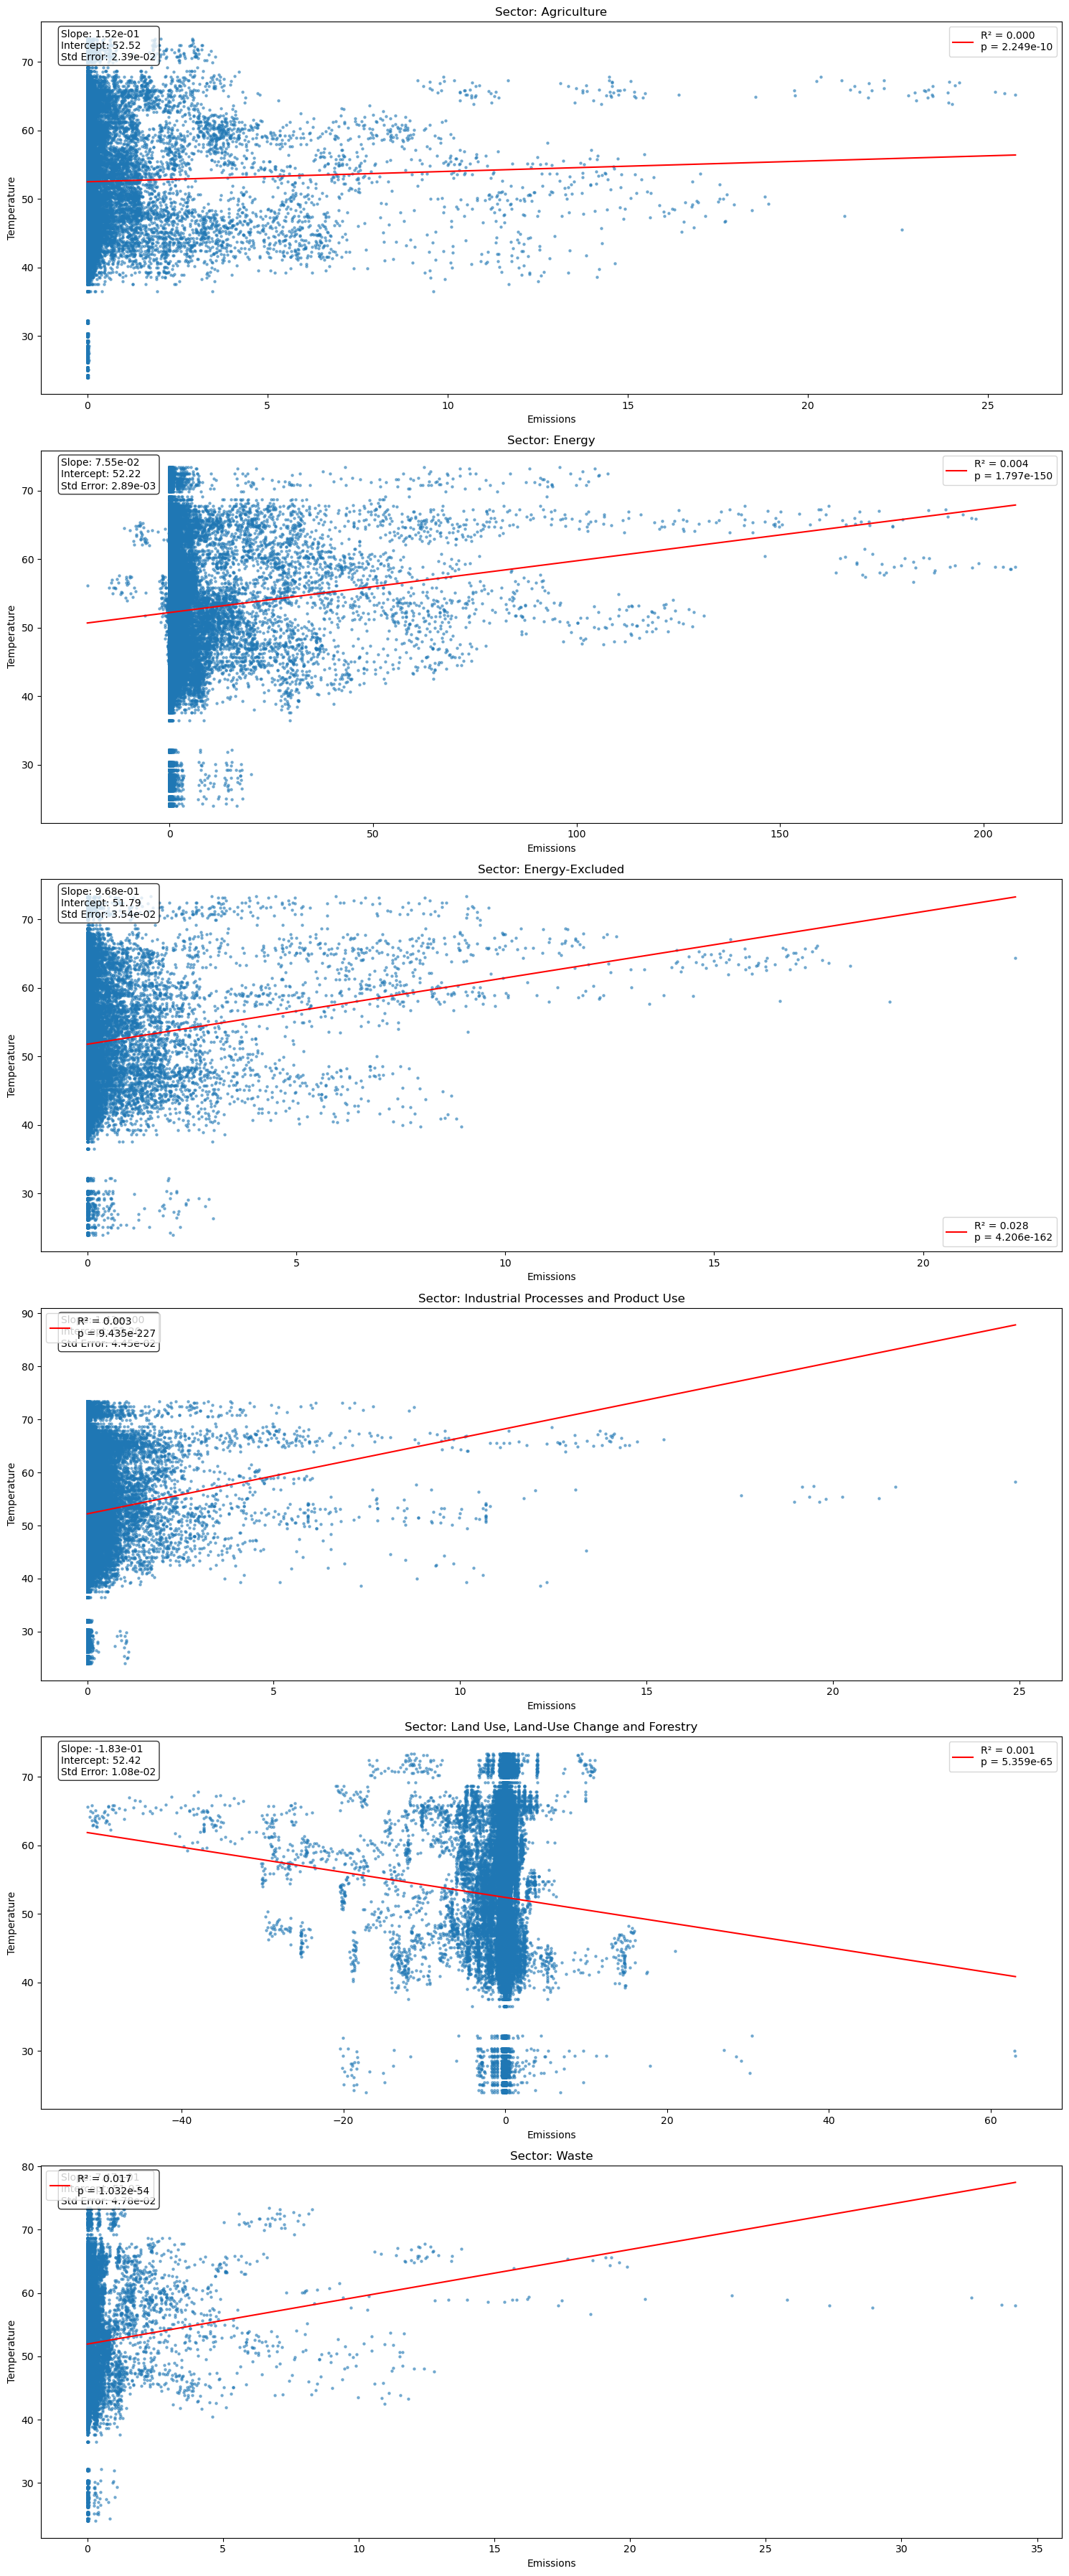

In [113]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

def run_sector_group_analysis(un_sector):
    # Group by sector
    grouped = un_sector.groupby('sector')
    
    # Store results
    results = {}
    
    # Create subplot grid
    n_sectors = len(grouped)
    fig, axs = plt.subplots(n_sectors, 1, figsize=(15, 6*n_sectors))
    
    # For each sector group
    for idx, (sector_name, sector_data) in enumerate(grouped):
        # Get temperature and emission data for all years
        temps = []
        emissions = []
        
        # Collect data across all years
        for year in range(1990, 2023):
            temp_col = f'{year}Temp'
            emission_col = f'Y{year}'
            
            # Convert to numeric and handle any non-numeric values
            year_temps = pd.to_numeric(sector_data[temp_col], errors='coerce')
            year_emissions = pd.to_numeric(sector_data[emission_col], errors='coerce')
            
            # Only keep pairs where both values are valid
            valid_mask = ~pd.isna(year_temps) & ~pd.isna(year_emissions)
            valid_temps = year_temps[valid_mask]
            valid_emissions = year_emissions[valid_mask]
            
            temps.extend(valid_temps)
            emissions.extend(valid_emissions)
        
        # Convert to numpy arrays
        temps = np.array(temps)
        emissions = np.array(emissions)
        
        # Skip if no valid data
        if len(temps) == 0 or len(emissions) == 0:
            print(f"Skipping {sector_name} - no valid data")
            continue
            
        # Run regression
        slope, intercept, r_value, p_value, std_err = st.linregress(emissions, temps)
        
        # Store results
        results[sector_name] = {
            'slope': slope,
            'intercept': intercept,
            'r_squared': r_value**2,
            'p_value': p_value,
            'std_err': std_err
        }
        
        # Plot
        if isinstance(axs, np.ndarray):
            ax = axs[idx]
        else:
            ax = axs  # In case there's only one sector
            
        ax.scatter(emissions, temps, alpha=0.5, s=5)
        
        # Add regression line
        x_range = np.linspace(min(emissions), max(emissions), 100)
        ax.plot(x_range, slope * x_range + intercept, 'r', 
               label=f'R² = {r_value**2:.3f}\np = {p_value:.3e}')
        
        ax.set_title(f'Sector: {sector_name}')
        ax.set_xlabel('Emissions')
        ax.set_ylabel('Temperature')
        ax.legend()
        
        # Add text with statistics
        stats_text = (f'Slope: {slope:.2e}\n'
                     f'Intercept: {intercept:.2f}\n'
                     f'Std Error: {std_err:.2e}')
        ax.text(0.02, 0.98, stats_text, 
               transform=ax.transAxes,
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    
    # Print summary of results
    print("\nRegression Results Summary:")
    print("--------------------------")
    for sector, stats in results.items():
        print(f"\nSector: {sector}")
        print(f"R-squared: {stats['r_squared']:.4f}")
        print(f"P-value: {stats['p_value']:.4e}")
        print(f"Slope: {stats['slope']:.4e}")
    
    return fig, results

# Run the analysis
fig, regression_results = run_sector_group_analysis(un_sector)
plt.show()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Temperature (°C)')

Text(0.5, 1.0, 'Time Series Regression: Emissions vs Temperature (1990-2022)')

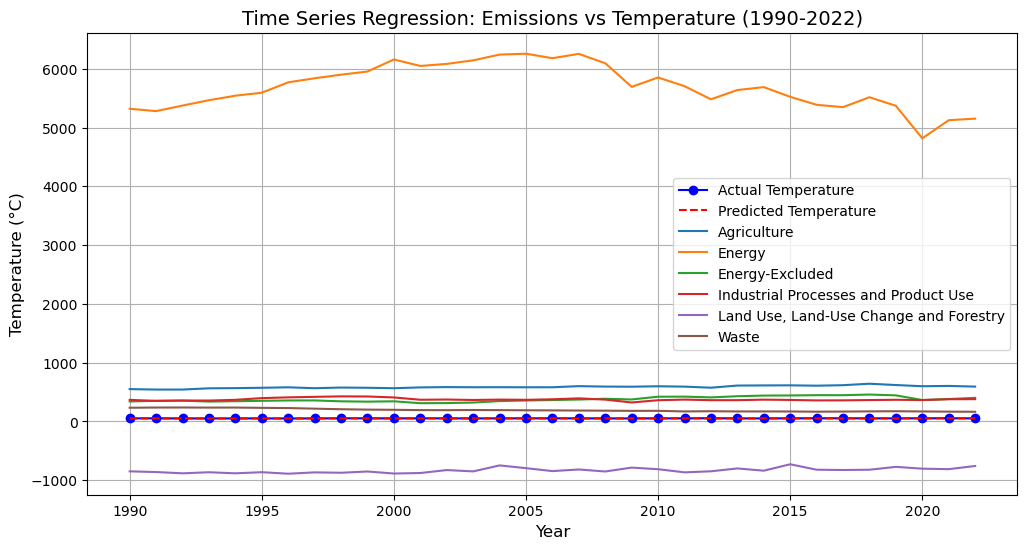

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Preparing the time series data
years = list(range(1990, 2023))  # Extract years from column names
emissions_columns = [f"Y{year}" for year in years]
temperature_columns = [f"{year}_Temp" for year in years]

sector_emissions_data = un_sector.groupby('sector')[[f"Y{year}" for year in years]].sum()
state_emissions_data = un_sector.groupby('geo_ref')[[f"Y{year}" for year in years]].sum()
# sector_emissions_data
# state_emissions_data
temperature_data = un_sector.groupby('geo_ref')[[f"{year}Temp" for year in years]].mean().agg(['mean'])


# # Aggregating data
# X = sector_emissions_data.T  # Shape (33, 6)
y = temperature_data.values.reshape(-1)  # Shape (33,)
# X.shape, y.shape

# # Add constant for regression
# X = sm.add_constant(X)

# # Fit the regression model
# time_series_model = sm.OLS(y, X).fit()
# print(time_series_model.summary())

plt.figure(figsize=(12, 6))
plt.plot(years, y, label='Actual Temperature', color='blue', marker='o')
# plt.plot(years, , label='Predicted Temperature', color='red', linestyle='--')
for sector in sector_emissions_data.index:
    plt.plot(years, sector_emissions_data.loc[sector], label=sector)

plt.legend()

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Time Series Regression: Emissions vs Temperature (1990-2022)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


In [150]:
for sector in sector_emissions_data.index:
    ax.plot(years, sector_emissions_data.loc[sector], label=sector)
    ax.legend(title='Sector')

ax.show()

AttributeError: 'Axes' object has no attribute 'show'

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load your dataset
data = pd.read_csv('unSectorWithTemp.csv')

# Select emissions and temperature columns (adjust column names based on your dataset)
emissions_columns = [f"Y{year}" for year in range(1990, 2023)]  # Example
temperature_columns = [f"{year}Temp" for year in range(1990, 2023)]  # Example

# Prepare the data
X = data[emissions_columns].T  # Transpose to align with time series
y = temperature_data.values.reshape(-1)  # Average temperature

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant for regression
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS regression model
model = sm.OLS(y_train, X_train).fit()

# Predict and evaluate on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print model summary and R^2 score
print(model.summary())
print(f"R^2 Score: {r2}")


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resi

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 04 Dec 2024   Prob (F-statistic):                nan
Time:                        12:52:59   Log-Likelihood:                 712.52
No. Observations:                  26   AIC:                            -1373.
Df Residuals:                       0   BIC:                            -1340.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           1.052e-14        inf          0        n

,sector,subsector,category,sub_category_1,sub_category_2,sub_category_3,carbon_pool,fuel1,fuel2,geo_ref,...,2013Temp,2014Temp,2015Temp,2016Temp,2017Temp,2018Temp,2019Temp,2020Temp,2021Temp,2022Temp
0,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,AK,...,27.8,30.3,30.0,31.9,29.3,30.4,32.2,27.5,26.5,28.6
1,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,AL,...,62.6,62.0,64.6,65.3,65.0,64.5,65.4,64.9,64.2,64.0
2,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,AR,...,59.6,58.7,61.4,62.8,62.5,61.2,61.2,61.2,61.4,61.2
3,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,AZ,...,60.5,62.3,61.8,62.2,63.0,62.3,60.3,62.6,62.1,61.2
4,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,CA,...,59.3,61.5,60.8,60.1,60.3,60.1,58.4,60.5,60.4,60.1


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage Change (%)')

Text(0.5, 1.0, 'Percentage Change in Emissions and Temperature (1990-2022)')

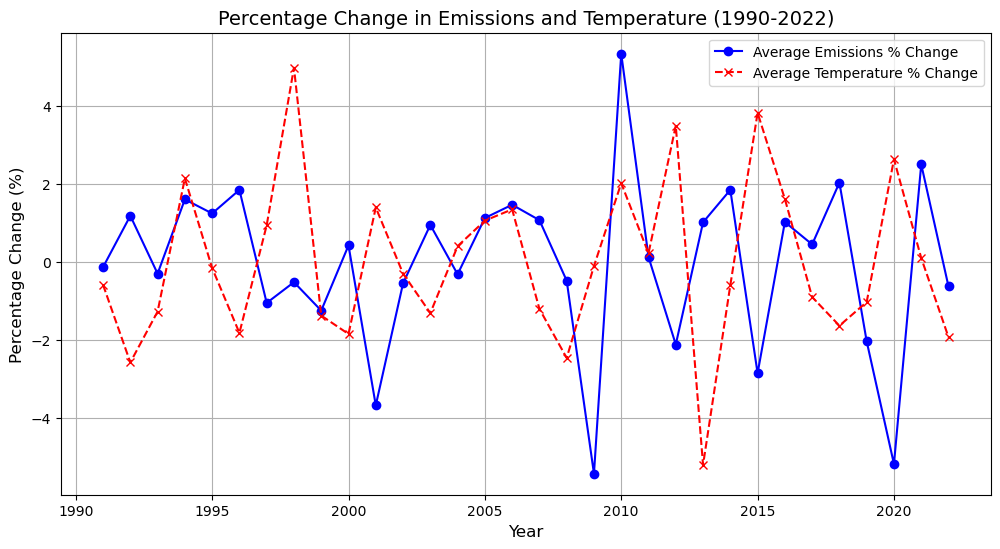

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('unSectorWithTemp.csv')
# Identify emissions and temperature columns
emissions_columns = [col for col in data.columns if col.startswith("Y") and col[1:].isdigit()]
temperature_columns = [col for col in data.columns if col.endswith("Temp")]

# Calculate percentage change for emissions and temperature data
emissions_pct_change = sector_emissions_data[emissions_columns].pct_change(axis=1) * 100
temperature_pct_change = temperature_data[temperature_columns].pct_change(axis=1) * 100

# Compute mean percentage change across rows for emissions and temperature
avg_emissions_pct_change = emissions_pct_change.mean(axis=0)
avg_temperature_pct_change = temperature_pct_change.mean(axis=0)

# Years for plotting
years = [int(col[1:]) for col in emissions_columns]

# Plot percentage changes
plt.figure(figsize=(12, 6))

# Plot emissions percentage change
plt.plot(years, avg_emissions_pct_change, label='Average Emissions % Change', marker='o', linestyle='-', color='blue')

# Plot temperature percentage change
plt.plot(years, avg_temperature_pct_change, label='Average Temperature % Change', marker='x', linestyle='--', color='red')

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.title('Percentage Change in Emissions and Temperature (1990-2022)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.show()


Correlation Coefficient between Emissions % Change and Temperature % Change: -0.2371


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Emissions % Change')

Text(0, 0.5, 'Temperature % Change')

Text(0.5, 1.0, 'Correlation between Emissions and Temperature Percentage Change')

Text(0.05, 0.95, 'Correlation: -0.24')

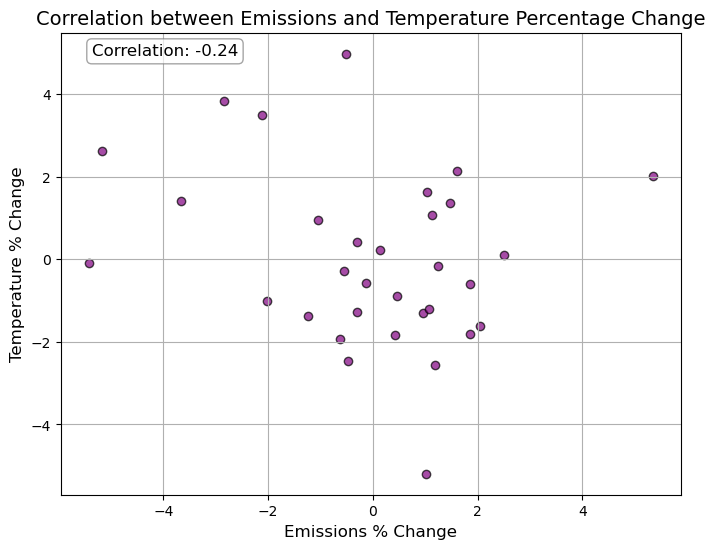

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure emissions and temperature percentage change data are aligned by year
aligned_emissions_pct_change = avg_emissions_pct_change.dropna().values
aligned_temperature_pct_change = avg_temperature_pct_change.dropna().values

# Calculate correlation coefficient between emissions % change and temperature % change
correlation = np.corrcoef(aligned_emissions_pct_change, aligned_temperature_pct_change)[0, 1]

# Display the correlation result
print(f"Correlation Coefficient between Emissions % Change and Temperature % Change: {correlation:.4f}")

# Scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(aligned_emissions_pct_change, aligned_temperature_pct_change, color='purple', alpha=0.7, edgecolor='k')

# Add labels and title
plt.xlabel('Emissions % Change', fontsize=12)
plt.ylabel('Temperature % Change', fontsize=12)
plt.title('Correlation between Emissions and Temperature Percentage Change', fontsize=14)
plt.grid(True)

# Add the correlation value to the plot
plt.annotate(f"Correlation: {correlation:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, 
             bbox=dict(boxstyle="round", fc="w", ec="gray", alpha=0.7))

plt.show()
